# **Proyecto Genoma - Africa - Grupo 1**


PCA elije los dos dimensiones que explican la mayor varianza entre las mutaciones de las personas.


In [ ]:
import numpy as np
from numpy import linalg as LA
from statistics import mode
import scipy
from scipy import linalg
from scipy import stats
import random
import time

from scipy.linalg import eigh

import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
# Primero convierta los datos del archivo de las nucleobases a una matriz real (de matriz de letras a numeros --> Binario)

data_dir = '/content/ML/'
data_filename = 'p4dataset2020.txt'

n_cols = 10101
n_rows = 995
n_metadata_cols = 3

X = np.zeros((n_rows, n_cols))
metadata = np.zeros((n_rows, n_metadata_cols))

with open(data_dir + data_filename, 'r') as f:
  lines = f.read().split("\n")[:-1]
  metadata = np.array([line.split(" ")[:n_metadata_cols] for line in lines])
  data = np.array([line.split(" ")[n_metadata_cols:] for line in lines])
  modes = [mode(data[:, j]) for j in range(0, n_cols)] #uso MODA: letra que mas se repite  -> 0 = "no tiene mutacion = moda" ; 1 = "hubo mutacion ya que != moda"
  for i in range(0, n_rows):
    X[i,:] = (modes != data[i,:])

np.save('X.npy', X)
np.save('metadata.npy', metadata)

In [ ]:
X = np.load('X.npy')
X -= np.mean(X, axis = 0) # centrando los datos, calcula la media en las columnas,

In [ ]:
metadata = np.load('metadata.npy')

In [ ]:
# creamos el diccionario code_G_dict para la metadata correspondiente a la ubicacion geografica --> https://www.internationalgenome.org/faq/which-populations-are-part-your-study/
metadata
metadata.shape
codes = metadata[:,2]

code_dict = {}
for code in codes:
    code_dict[code] = [c == code for c in codes]
# Esto crea un diccionario donde cada codigo geografico es una key, y a cada
# key le asigna una lista de 0s (False) y 1s (True)
# el elemento i-esimo de esta lista es 1 si la persona i-esima
# es de a esa zona y un 0 si es de otra zona

print(code_dict.keys()) # lista de keys, o codigos geograficos

# podemos crear un vector para cada key con la lista asociada. Por ejemplo:
ACB = np.asarray(code_dict["ACB"])
print(ACB.shape) # la shape es (995,), los elementos son T o F
print(ACB[:10]) # muestra los primeros 10
print(np.mean(ACB)) # 12.26% de la gente es de ACB
print(1.0/7) # hay 7 codigos diferentes

dict_keys([np.str_('ACB'), np.str_('GWD'), np.str_('ESN'), np.str_('MSL'), np.str_('YRI'), np.str_('LWK'), np.str_('ASW')])
(995,)
[ True  True  True  True  True  True  True  True  True  True]
0.12261306532663317
0.14285714285714285


In [ ]:
A = np.dot(X.T,X)/n_rows  #construimos la matriz varianza-covarianza
A.shape

(10101, 10101)

In [ ]:
start_time = time.time() # extraemos los 3 autovalores mas grandes de A y sus autovectores
w, v = scipy.linalg.eigh(A, subset_by_index=[n_cols-3, n_cols-1]) #w = autovalor menor
print(time.time() - start_time, "segundos")  # medimos el tiempo que tarda

164.17333912849426 segundos


In [ ]:
print(w)
v.shape

[ 8.85345851 10.98992228 13.48754945]


(10101, 3)

In [ ]:
# separamos los tres autovectores (columnas de v)
v_pca1 = v[:,2]
v_pca2 = v[:,1]
v_pca3 = v[:,0]

print(v_pca1.shape)

(10101,)


In [ ]:
# proyectamos las 995 filas de X en la direccion de los
# autovectores v_pca1, v_pca2 y v_pca3
x1 = np.dot(X,v_pca1)
x2 = np.dot(X,v_pca2)
x3 = np.dot(X,v_pca3)

print(x1.shape)

(995,)


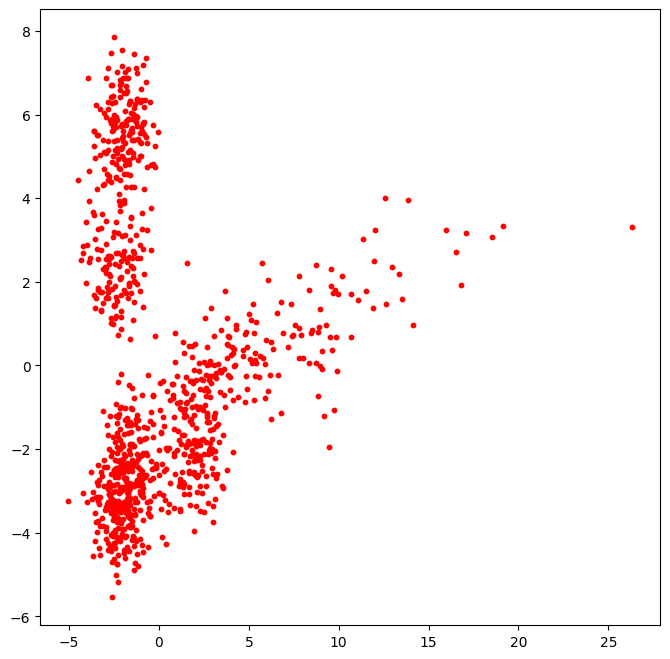

In [ ]:
# Ejercicio 2: estudiamos x1 y x2
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1, x2, s=10, c ="r")

In [ ]:
# vector para cada key (automatizar esto)
ACB = np.asarray(code_dict["ACB"])
GWD = np.asarray(code_dict["GWD"])
ESN = np.asarray(code_dict["ESN"])
MSL = np.asarray(code_dict["MSL"])
YRI = np.asarray(code_dict["YRI"])
LWK = np.asarray(code_dict["LWK"])
ASW = np.asarray(code_dict["ASW"])

In [ ]:
a = np.array([1,2,3])
b = np.array([0,1,0])
a*b

array([0, 2, 0])

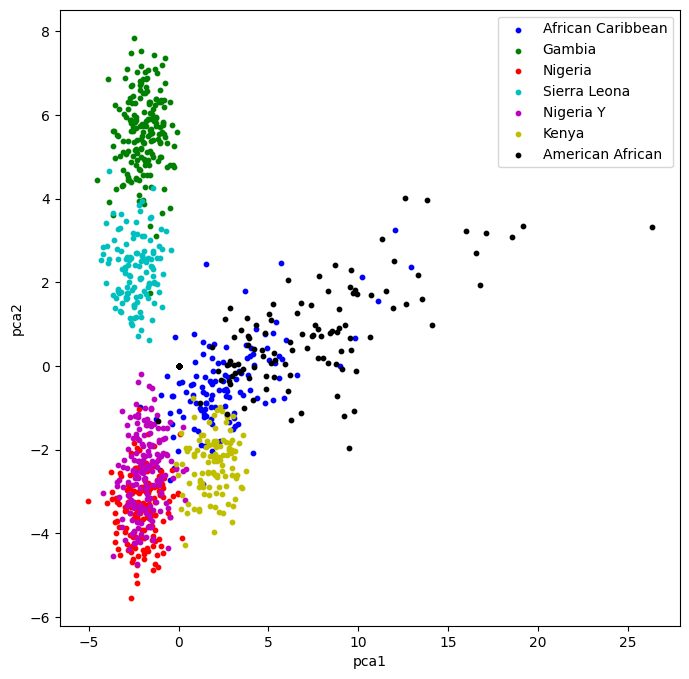

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))


ax.scatter(x1*ACB, x2*ACB, s=10, c ="b", label="African Caribbean")
ax.scatter(x1*GWD, x2*GWD, s=10, c ="g", label="Gambia")
ax.scatter(x1*ESN, x2*ESN, s=10, c ="r", label="Nigeria")
ax.scatter(x1*MSL, x2*MSL, s=10, c ="c", label="Sierra Leona")
ax.scatter(x1*YRI, x2*YRI, s=10, c ="m", label="Nigeria Y")
ax.scatter(x1*LWK, x2*LWK, s=10, c ="y", label="Kenya")
ax.scatter(x1*ASW, x2*ASW, s=10, c ="k", label="American African")

plt.xlabel("pca1")
plt.ylabel('pca2')
ax.legend()


plt.show()
fig.savefig("PC1y2.png")

- Los primeros dos PCs capturan claramente la subdivisión geográfica dentro de África y distinguen poblaciones con historias demográficas y migratorias diferentes.

- Las poblaciones afro-descendientes en América y el Caribe aparecen intermedias y muy dispersas, lo que concuerda con la mezcla variable de linajes africanos y no-africanos en sus genomas.

- La PCA es una herramienta muy eficaz para visualizar patrones de variación genómica y detectar tanto estructuras poblacionales como grados de admixture.

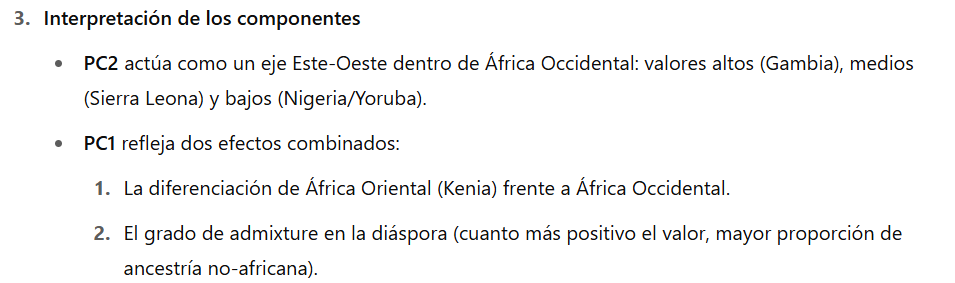

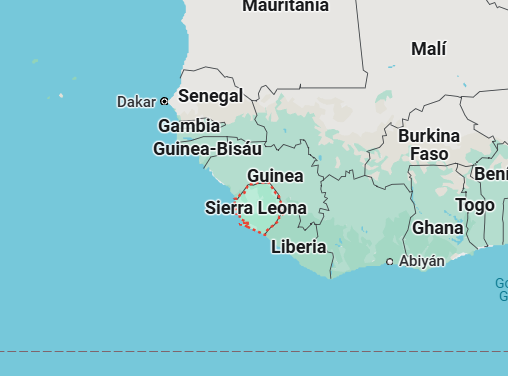

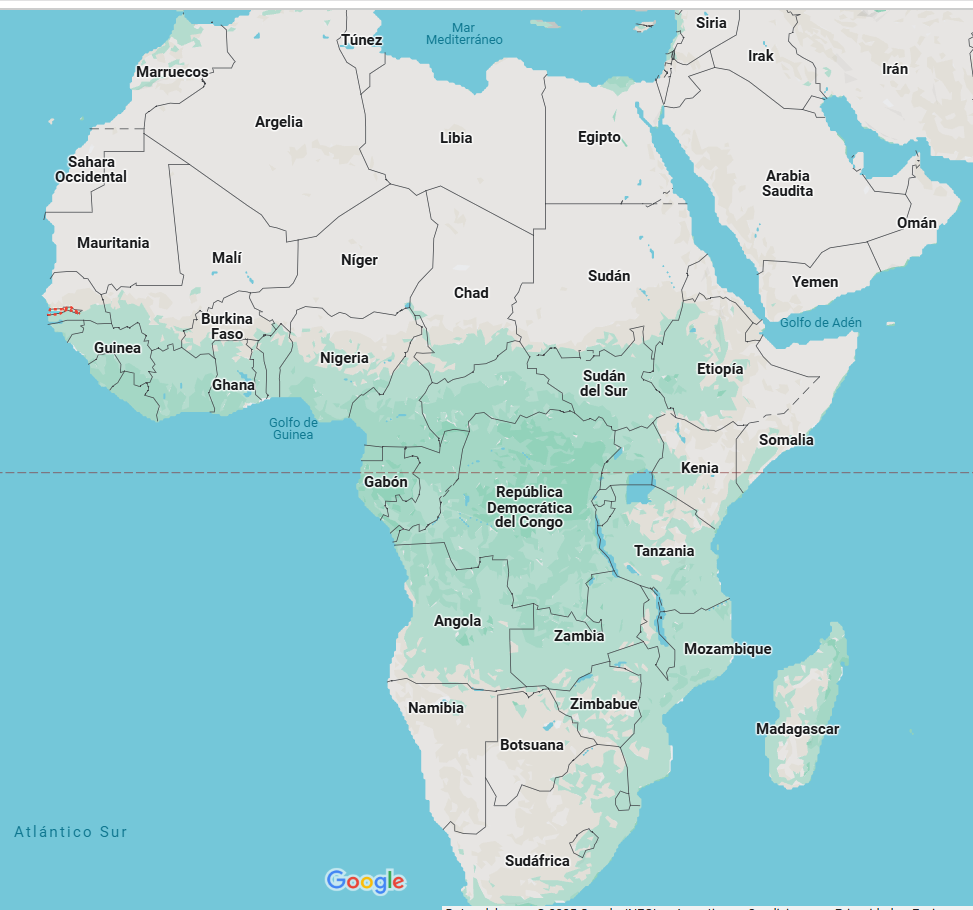

# Para sexo: examinamos el tercer componente principal de x

In [ ]:
x3 = np.dot(X,v_pca3)

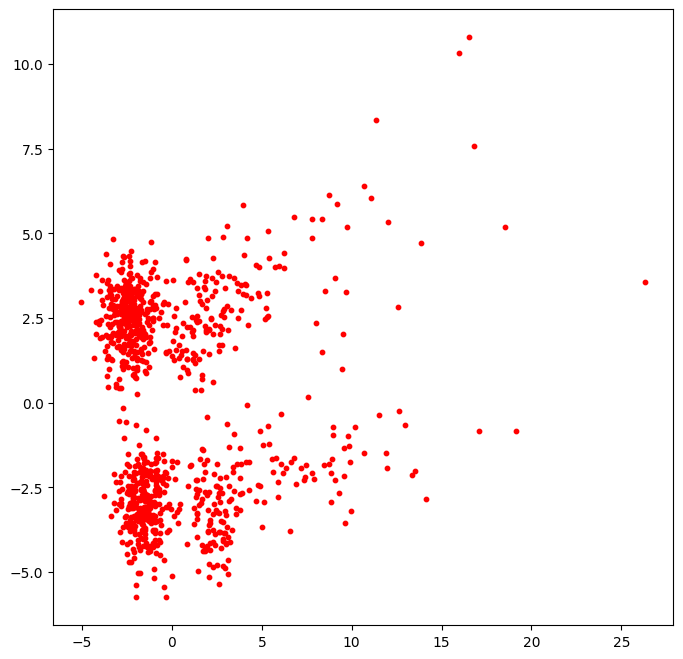

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1, x3 , s=10, c ="r")

In [ ]:
metadata
metadata.shape
codes = metadata[:,1]

code_dict = {}
for code in codes:
    code_dict[code] = [c == code for c in codes]

print(code_dict.keys())

dict_keys([np.str_('1'), np.str_('2')])


In [ ]:
# podemos crear un vector para cada key con la lista asociada. Por ejemplo:
hombre = np.asarray(code_dict ['1'])
print(hombre.shape) # la shape es (995,), los elementos son T o F
print(hombre[:10]) # muestra los primeros 10
print(np.mean(hombre)) # 12.26% de la gente es de ACB
print(1.0/7) # hay 7 codigos diferentes

mujer = np.asarray(code_dict['2'])
print(mujer.shape)

(995,)
[ True False False  True False False  True False  True  True]
0.5115577889447236
0.14285714285714285
(995,)


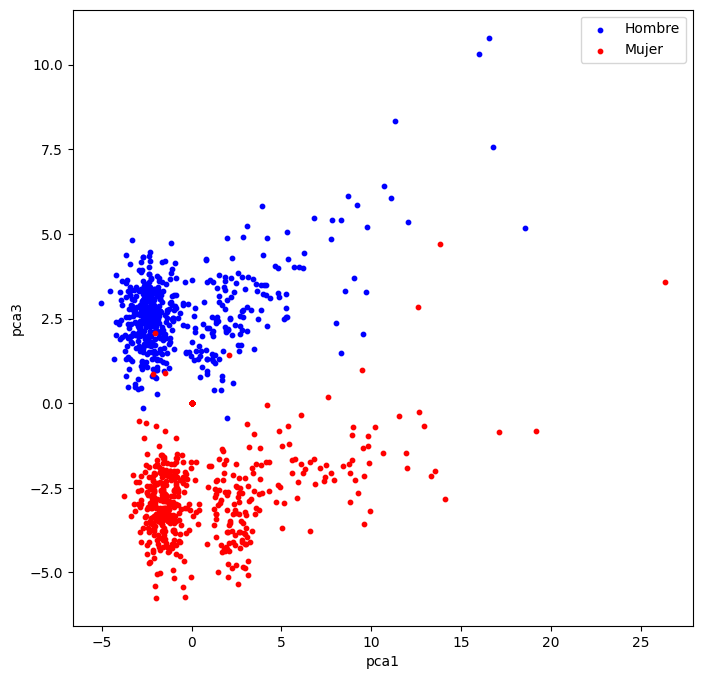

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x1*hombre, x3*hombre, s=10, c ="b", label="Hombre")
ax.scatter(x1*mujer, x3*mujer, s=10, c ="r", label="Mujer")

plt.xlabel("pca1")
plt.ylabel('pca3')
ax.legend()

plt.show()
fig.savefig("PC1y3.png")

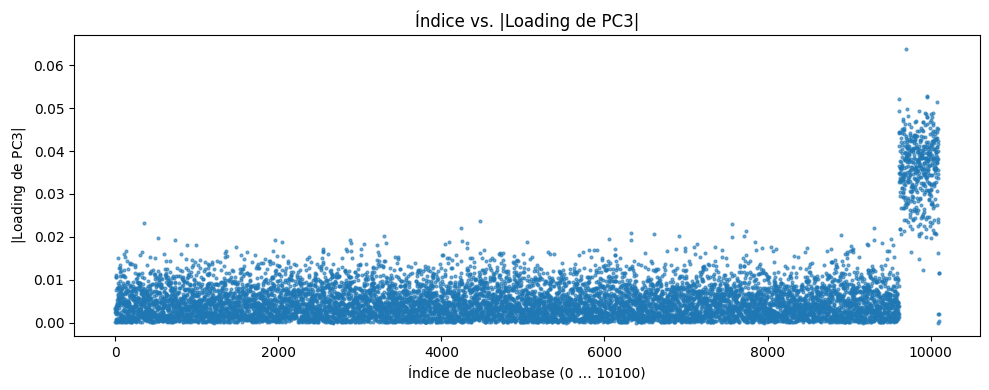

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suponemos que v_pca3 ya existe y tiene dimensión (10101,)
# Es decir, v_pca3[i] = loading del SNP i en el componente 3.

# 1) Generamos el eje de índices: 0, 1, 2, …, 10100
indices = np.arange(v_pca3.shape[0])   # esto va de 0 hasta 10100

# 2) Calculamos el valor absoluto de cada loading de PC3
abs_pc3 = np.abs(v_pca3)

# 3) Graficamos
plt.figure(figsize=(10, 4))
plt.scatter(indices, abs_pc3, s=4, alpha=0.6)
plt.xlabel('Índice de nucleobase (0 … 10100)')
plt.ylabel(r'$|\text{Loading de PC3}|$')
plt.title('Índice vs. |Loading de PC3|')
plt.tight_layout()
plt.show()

